In [109]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import figure
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from collections import defaultdict
from settings import SECRET

In [110]:
cid = '5dd1f032529041c789a14d006f606b51'
secret = SECRET
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [111]:
def get_playlist_uri(link):
    return link.split("/")[-1].split("?")[0]

playlist_link = "https://open.spotify.com/playlist/4C2l2HYFzQjyQjyENdpoLc?si=eaf2151f9ea54168"
playlist_URI = get_playlist_uri(playlist_link)

In [112]:
def get_track_data(playlist):
    track_data = {'uri':[],
                'name':[],
                'artist':[],
                'artist_uri':[],
                'artist_name':[],
                'album':[],
                'track_pop':[],
                'danceability':[],
                'energy':[],
                'key':[],
                'loudness':[],
                'mode':[],
                'speechiness':[],
                'acousticness':[],
                'instrumentalness':[],
                'liveness':[],
                'valence':[],
                'tempo':[],
                'type':[]}
    for track in sp.playlist_tracks(playlist)["items"]:
        #URI
        track_uri = track["track"]["uri"]
        track_data['uri'].append(track_uri)
        #Track name
        track_name = track["track"]["name"]
        track_data['name'].append(track_name)
        #Main Artist
        artist_uri = track["track"]["artists"][0]["uri"]
        artist_info = sp.artist(artist_uri)
        track_data['artist'].append(artist_info)
        track_data['artist_uri'].append(artist_uri)
        #Name, popularity, genre
        artist_name = track["track"]["artists"][0]["name"]
        artist_pop = artist_info["popularity"]
        artist_genres = artist_info["genres"]
        track_data['artist_name'].append(artist_name)
        #Album
        album = track["track"]["album"]["name"]
        track_data['album'].append(album)
        
        #Popularity of the track
        track_pop = track["track"]["popularity"]
        track_data['track_pop'].append(track_pop)

        track_audio_inf = sp.audio_features(track_uri)[0]
        del track_audio_inf['uri']
        for key in track_audio_inf.keys():
            if key in track_data.keys():
                track_data[key].append(track_audio_inf[key])
        track_df = pd.DataFrame(track_data)
    return track_df

track_df = get_track_data(playlist_URI)  
track_df  

,uri,name,artist,artist_uri,artist_name,album,track_pop,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type
0,spotify:track:0KVWVuutF9Dn8li4HdyAeU,"Archie, Marry Me",{'external_urls': {'spotify': 'https://open.sp...,spotify:artist:3kzwYV3OCB010YfXMF0Avt,Alvvays,Alvvays,67,0.268,0.829,7,-4.592,1,0.0743,0.00986,0.434000,0.1420,0.203,117.351,audio_features
1,spotify:track:3EEr6l5PYelwkrvvKX7N0X,Shut Up Kiss Me,{'external_urls': {'spotify': 'https://open.sp...,spotify:artist:6mKqFxGMS5TGDZI3XkT5Rt,Angel Olsen,MY WOMAN,59,0.375,0.630,7,-5.131,1,0.0453,0.05520,0.000000,0.1070,0.349,115.728,audio_features
2,spotify:track:2mlIzqDE7RaMaMx1UPdsXL,The Yeah Yeah Yeah Song,{'external_urls': {'spotify': 'https://open.sp...,spotify:artist:16eRpMNXSQ15wuJoeqguaB,The Flaming Lips,At War With the Mystics,44,0.636,0.887,4,-4.354,1,0.0475,0.00257,0.000052,0.2930,0.350,107.984,audio_features
3,spotify:track:5WbfFTuIldjL9x7W6y5l7R,Kingston,{'external_urls': {'spotify': 'https://open.sp...,spotify:artist:5szilpXHcwOqnyKLqGco5j,Faye Webster,Atlanta Millionaires Club,78,0.730,0.355,10,-9.130,0,0.0359,0.15400,0.001550,0.1170,0.560,142.143,audio_features
4,spotify:track:4qon9xHmMwWznurIzGTwL0,El Caporal,{'external_urls': {'spotify': 'https://open.sp...,spotify:artist:43O3c6wewpzPKwVaGEEtBM,My Morning Jacket,Dark Was The Night (Red Hot Compilation),22,0.515,0.679,7,-5.755,1,0.0276,0.08720,0.000000,0.2050,0.568,100.832,audio_features
5,spotify:track:7tITkd2OToE32ELyKO7OQM,Breezy Slide,{'external_urls': {'spotify': 'https://open.sp...,spotify:artist:7jOY91ZU7kn86slH3fBbaD,Louie Zong,Breezy Slide,45,0.635,0.561,5,-12.549,1,0.0363,0.17200,0.000217,0.1890,0.575,101.727,audio_features
6,spotify:track:534uBUA3qVXAp1jLfK5tL1,You've Got Me,{'external_urls': {'spotify': 'https://open.sp...,spotify:artist:1MIe1z4RdqLqHSJsb7EBMm,The Greeting Committee,This Is It,52,0.630,0.634,1,-4.852,0,0.0252,0.29400,0.000000,0.3280,0.630,99.026,audio_features
7,spotify:track:38OvTFIg5ZYRow2sA1jgKo,Everybody Wants to Love You,{'external_urls': {'spotify': 'https://open.sp...,spotify:artist:7MoIc5s9KXolCBH1fy9kkw,Japanese Breakfast,Psychopomp,57,0.481,0.876,7,-3.263,1,0.0345,0.40800,0.153000,0.2830,0.682,129.921,audio_features
8,spotify:track:1OuF7WqX6vbuGKfvH0HpRf,I Was Born (A Unicorn),{'external_urls': {'spotify': 'https://open.sp...,spotify:artist:7L5HH5QtkDe7u2hJ1FUKFo,The Unicorns,Who Will Cut Our Hair When We're Gone? (Remast...,44,0.556,0.511,4,-7.848,1,0.1220,0.01170,0.000083,0.0316,0.735,144.546,audio_features
9,spotify:track:51DZ0wUocQ8sQfjnibXVcD,Unbelievers,{'external_urls': {'spotify': 'https://open.sp...,spotify:artist:5BvJzeQpmsdsFp4HGUYUEx,Vampire Weekend,Modern Vampires of the City,64,0.644,0.811,11,-7.774,1,0.0517,0.14900,0.000473,0.1700,0.817,154.909,audio_features


<Figure size 640x480 with 0 Axes>

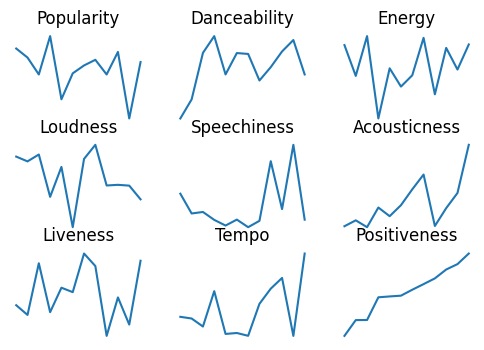

In [127]:
%matplotlib inline
def playlist_plot(track_df):
    plt.clf()
    fig, axs = plt.subplots(3,3)
    fig.set_size_inches(6,4)
    axs[0,0].plot(track_df.track_pop)
    axs[0,0].axis('off')
    axs[0,0].set_title("Popularity")

    axs[0,1].plot(track_df.danceability)
    axs[0,1].axis('off')
    axs[0,1].set_title("Danceability")

    axs[0,2].plot(track_df.energy)
    axs[0,2].axis('off')
    axs[0,2].set_title("Energy")

    axs[1,0].plot(track_df.loudness)
    axs[1,0].axis('off')
    axs[1,0].set_title("Loudness")

    axs[1,1].plot(track_df.speechiness)
    axs[1,1].axis('off')
    axs[1,1].set_title("Speechiness")

    axs[1,2].plot(track_df.acousticness)
    axs[1,2].axis('off')
    axs[1,2].set_title("Acousticness")

    axs[2,0].plot(track_df.liveness)
    axs[2,0].axis('off')
    axs[2,0].set_title("Liveness")

    axs[2,1].plot(track_df.tempo)
    axs[2,1].axis('off')
    axs[2,1].set_title("Tempo")

    axs[2,2].plot(track_df.valence)
    axs[2,2].axis('off')
    axs[2,2].set_title("Positiveness")



    plt.show()
playlist_plot(track_df)

<Figure size 640x480 with 0 Axes>

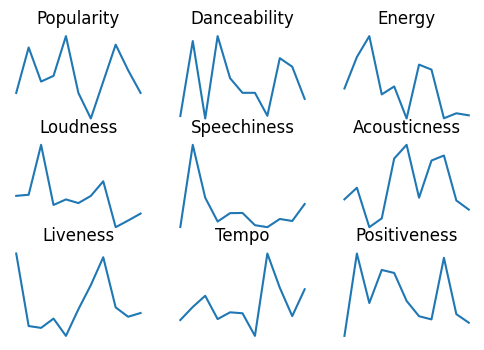

In [128]:
saslink = 'https://open.spotify.com/playlist/6aEcQKDvZ7nMl3C88ZVKMn?si=e62a80e495594da1'
sasuri = get_playlist_uri(saslink)
sas_df = get_track_data(sasuri)
playlist_plot(sas_df)

<Figure size 640x480 with 0 Axes>

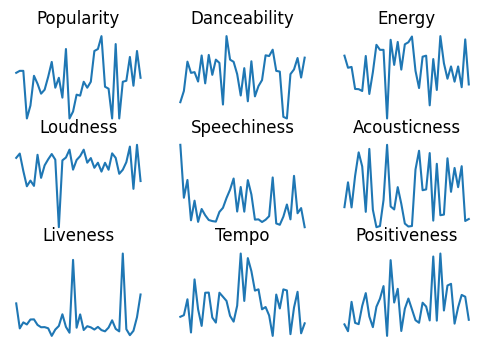

In [129]:
sadsongs = 'https://open.spotify.com/playlist/6wTUGHUIMfNvqCobTkVuPM?si=aec74df6bc32407d'
saduri = get_playlist_uri(sadsongs)
sad_df = get_track_data(saduri)
playlist_plot(sad_df)